In [4]:
# Python boilerplate 
import numpy as np
import scipy as spy
import matplotlib.pyplot as plt
%matplotlib notebook
%config InlineBackend.print_figure_kwargs = {}
import seaborn as sns
sns.set_style("whitegrid")
# Optimization thingy 
from gurobipy import *

# Real-time Control of Stormwater Networks using Horizon Planning 

# Ann Arbor's Stormwater Network 
![network](../data/images/AA.png)

 # State of Stormwater 
 ![stormwater](../data/images/stateofss.png)

# Larger Infrastructure
![network](../data/images/chicago_channel.png)
**Chicago Sewers  (4 Billion USD)**

# Smarter Stormwater Network 
 ![stormwater](../data/images/network_smarter.png) 

# Real-time Control using Horizon Planning

1. Model of the network 
2. Algorithms 
    - Centralized Control
    - Distributed Control
3. Results 
4. Future work 

# Network Model 
Network ~ $G(N,A)$
- Nodes $(N)$: Storage elements in the network 
    - Max Capacity for $i^{th}$ node : $C_i$
    - Volume at time $t$ in $i^{th}$ node : $V^t_i$
    - Outflow at time $t$ from $i^{th}$ node : $x^t_i$
    - Inflow at time $t$ to $i^{th}$ node from rain : $q^t_i$
- Links $(A)$: Routing Elements
    - Max flow carrying capacity in $i^{th}$ link : $u_i$
    - Total flow through $i^{th}$ link for $T$ horizon : ${Vx}^T_i$

# Network dynamics

* **Mass balance**
$$ V_i^t = V_i^{t-1} + q_i^{t} +  \sum_{j} x_{ji}^{t-\delta_{ji}} - \sum_{j} x_{ij}^{t}$$

$\delta_{ji}$ is the travel time between nodes

* **Physical constraints on outflows from nodes**
$$ q_{out} \leq \sqrt{2 \times g \times water\ depth} $$

<IPython.core.display.Javascript object>


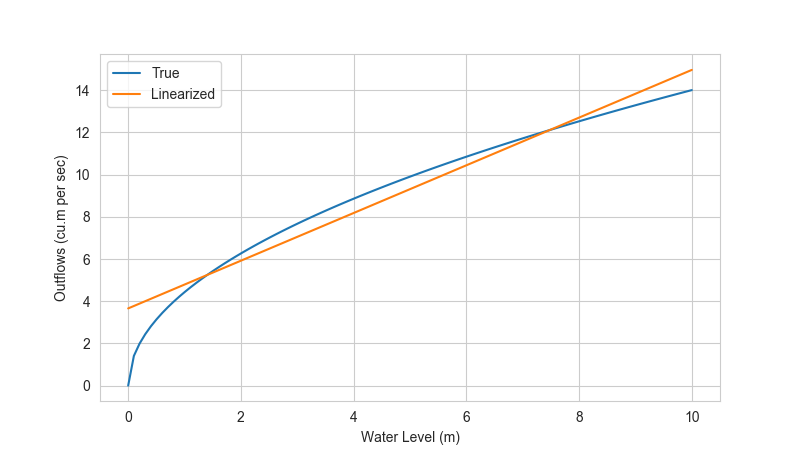

In [5]:
## Linearizing square root
height  = np.linspace(0,1000,100)/100    # (volume/area)
outflow = np.sqrt(2*9.81*height)         # Generate the outflows 
coeffws = np.polyfit(height, outflow, 1) # Get the first order polyfit 
plt.plot(height, outflow, label = "True")
plt.plot(height, coeffws[0]*height + coeffws[1], label = "Linearized")
plt.ylabel("Outflows (cu.m per sec)");plt.xlabel("Water Level (m)");plt.legend()

**Linearized constraint**
$$ q^t_{out} \leq 1.13047751 \times V^t_i/A_i + 3.65949363 $$

# Control Algorithm 

1. Centralized Control : Single Master Problem 
2. Distributed Control : Master Problem and a set of sub-problems 


# Centralized Control Algorithm 
***Objective Function***
$$ \min \sum^N_{i} \sum^T_t V_i^t $$
***Constraints***

_Mass Balance_:
$$ V_i^t = V_i^{t-1} + q_i^{t} +  \sum_{j} x_{ji}^{t-\delta_{ji}} - \sum_{j} x_{ij}^{t}\ \text{for}\ \forall t\  \text{and}\ \forall i \in N$$
_Flow thresholds_:
$$ x_{ij}^t \leq u_{ij}\ \text{for}\ \forall t\  \text{and}\ \forall ij \in A$$

_Outflow limitation_:
$$ x_{ij}^t \leq f(V_{ij}^{t-1}) \ \text{for}\ \forall t\  \text{and}\ \forall ij \in A$$

# Distributed Control Algorithm 

![network](../data/images/dist_algo.png)

**Master Problem**
***Objective***
$$ \max \sum^N_i V_{ij}^i $$
***Constraints***

_Mass Balance_:
$$ V_i = V_i^0 + \sum_{j} V_{ji} - \sum_{i} V_{ij} $$
_Maximum Volume Movement_:
$$ V_{ij} \leq T \times u_{ij} $$ 

**Sub Problem**
$$ \max \sum^T_t x_{ij}^t $$
***Constraints***

_Mass Balance_:
$$ V_i^t = V_i^{t-1} + q_{i}^t - \sum_j x_{ij}^t $$ 
_Physical Constraints_:
$$ x_{ij}^t \leq 1.13047751 \times V^t_i/A_i + 3.65949363 $$
_Constraint from Master Problem_:
$$ \sum_t x_{ij}^t \leq V_{ij} $$

$ q_i^t $ inflows into the node

#  Results : 

![Three Ponds](../data/images/threeponds.png)

# Centralized Controller 
![3ponds](../data/images/3p_central.png)

# Centralized Controller : Coordination
![3ponds](../data/images/zoomedin_plot3p.png)

# Distributed Controller 
![dist_controller](../data/images/3p_dist.png)

# Issues to be addressed

1. Better objective formulations 
2. Spikes in the flows
3. Scalable formulation for horizon time

# Thank you.